In [1]:
import pyreadr #to read .rda datasets

In [2]:
#download the gavote dataset from julianfarway's repository
gavoteURL = 'https://github.com/julianfaraway/faraway/blob/main/data/gavote.rda'

In [3]:
gavote = pyreadr.read_r('gavote.rda')['gavote'] #reading a gavote data set

<h1> Page 2 <h1>

In [4]:
gavote.head()

,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
rownames,,,,,,,,,,
APPLING,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
ATKINSON,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
BACON,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
BAKER,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
BALDWIN,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


<h1> Page 3 </h1>

In [5]:
gavote.describe(include = 'all') 

,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
count,159,159,159.000000,159,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,5,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,LEVER,poor,NaN,rural,notAtlanta,NaN,NaN,NaN,NaN,NaN
freq,74,72,NaN,117,144,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.242981,NaN,NaN,7020.314465,8929.056604,381.654088,16331.025157,16926.503145
std,NaN,NaN,0.163082,NaN,NaN,19317.779818,18029.959822,1150.974980,36623.274439,37865.152282
min,NaN,NaN,0.000000,NaN,NaN,249.000000,271.000000,5.000000,832.000000,881.000000
25%,NaN,NaN,0.111500,NaN,NaN,1385.500000,1803.500000,30.000000,3506.500000,3693.500000
50%,NaN,NaN,0.233000,NaN,NaN,2326.000000,3597.000000,86.000000,6299.000000,6712.000000
75%,NaN,NaN,0.348000,NaN,NaN,4430.000000,7468.500000,210.000000,11846.500000,12251.000000


In [6]:
gavote['undercount'] = (gavote['ballots']-gavote['votes'])/gavote['ballots']

In [7]:
gavote['undercount'].describe()

count    159.000000
mean       0.043792
std        0.024965
min        0.000000
25%        0.027791
50%        0.039833
75%        0.056470
max        0.188121
Name: undercount, dtype: float64

In [10]:
import numpy as np #for mathematical operations

In [11]:
print(np.sum(gavote['ballots']-gavote['votes'])/np.sum(gavote['ballots']))

0.03518021308550396


In [13]:
#to plot figures
import seaborn as sns 
import matplotlib.pyplot as plt

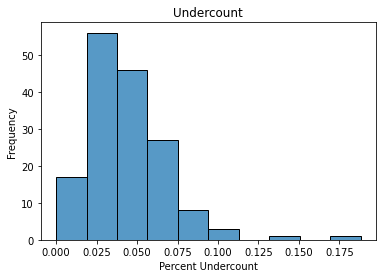

In [14]:
sns.histplot(data = gavote, 
                x = 'undercount', 
                bins = 10)

plt.title('Undercount')
plt.xlabel('Percent Undercount')
plt.ylabel('Frequency');

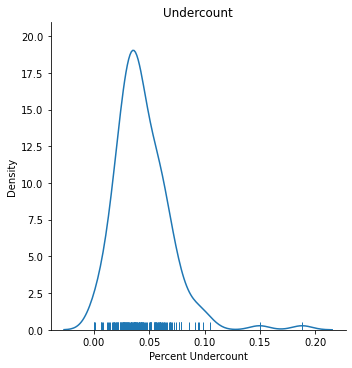

In [15]:
sns.displot(data = gavote, 
            x = 'undercount', 
            rug = True, 
            kind = 'kde')
            
plt.title('Undercount')
plt.xlabel('Percent Undercount');

<h1> Page 4 </h1>

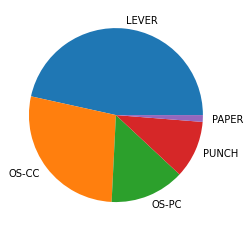

In [16]:
plt.pie(x = gavote['equip'].value_counts(), 
        labels=gavote['equip'].unique());

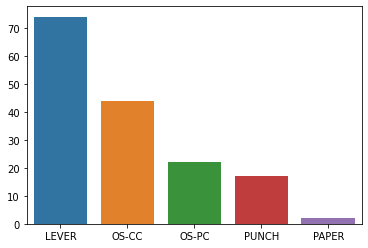

In [17]:
sns.countplot(data = gavote, 
                x = 'equip', 
                order = gavote['equip'].value_counts().index)

plt.ylabel('')
plt.xlabel('');

In [18]:
gavote['pergore'] = gavote['gore']/gavote['votes']

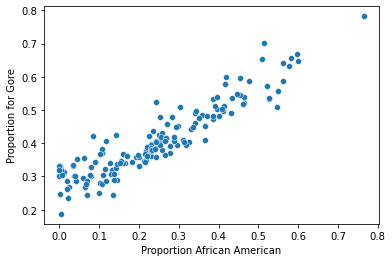

In [19]:
sns.scatterplot(data = gavote, 
                    x = 'perAA', 
                    y = 'pergore')
                    
plt.xlabel('Proportion African American')
plt.ylabel('Proportion for Gore');

In [21]:
import pandas as pd #for data analysis and manipulation

In [22]:
pd.crosstab(gavote['atlanta'],gavote['rural'])

rural,rural,urban
atlanta,,
Atlanta,1,14
notAtlanta,116,28


In [23]:
gavote.columns

Index(['equip', 'econ', 'perAA', 'rural', 'atlanta', 'gore', 'bush', 'other',
       'votes', 'ballots', 'undercount', 'pergore'],
      dtype='object')

In [24]:
gavote.rename(columns = {'rural':'usage'}, inplace = True)

<h1> Page 6 </h1>

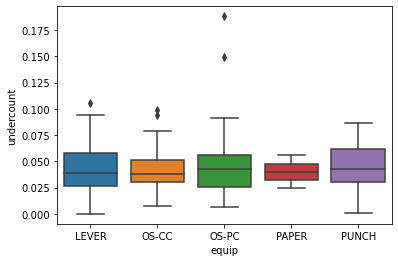

In [25]:
sns.boxplot(data = gavote, 
            x = 'equip', 
            y = 'undercount');

In [26]:
gavote[['perAA','ballots','undercount','pergore']].corr()

,perAA,ballots,undercount,pergore
perAA,1.000000,0.027732,0.229687,0.921652
ballots,0.027732,1.000000,-0.155172,0.095617
undercount,0.229687,-0.155172,1.000000,0.218765
pergore,0.921652,0.095617,0.218765,1.000000


<h1> Page 7 </h1>

In [27]:
import statsmodels.formula.api as smf  #for fitting a linear model

In [29]:
lmod = smf.ols(data = gavote, 
                formula = 'undercount~pergore+perAA').fit()

In [30]:
lmod.params

Intercept    0.032376
pergore      0.010979
perAA        0.028533
dtype: float64

<h1> Page 8 </h1>

In [37]:
lmod.predict()

array([0.04133661, 0.04329088, 0.03961823, 0.05241202, 0.04795484,
       0.03601558, 0.03794768, 0.03824856, 0.0456844 , 0.03951183,
       0.0491883 , 0.0408404 , 0.0367021 , 0.04716214, 0.03946337,
       0.04272642, 0.05136792, 0.04401044, 0.05485224, 0.04179928,
       0.04344251, 0.03976103, 0.03602163, 0.04292433, 0.04750227,
       0.04764892, 0.03942706, 0.03555377, 0.04504196, 0.05549852,
       0.05405937, 0.04421053, 0.04099018, 0.04394917, 0.04171247,
       0.0379354 , 0.04412875, 0.03966886, 0.04419461, 0.04611705,
       0.03605864, 0.0351185 , 0.0466983 , 0.05475324, 0.04331231,
       0.05151597, 0.05358825, 0.04115587, 0.04775781, 0.03789845,
       0.03881787, 0.04444902, 0.04584928, 0.04515983, 0.03598472,
       0.03833868, 0.03963718, 0.03451702, 0.03800347, 0.05058744,
       0.03569792, 0.03705342, 0.04223991, 0.03694448, 0.04373769,
       0.04733356, 0.03915798, 0.03575577, 0.03718296, 0.06279187,
       0.03751672, 0.04064671, 0.04107793, 0.03930191, 0.03963

In [39]:
lmod.resid

rownames
APPLING      0.036947
ATKINSON    -0.006995
BACON        0.065551
BAKER        0.002348
BALDWIN      0.003590
               ...   
WHITFIELD   -0.013691
WILCOX      -0.017654
WILKES      -0.022084
WILKINSON   -0.035835
WORTH        0.017498
Length: 159, dtype: float64

In [70]:
lmod.ssr

0.09324917740978238

In [54]:
len(lmod.resid)

159

In [58]:
len(gavote)-len(lmod.params)

156

In [71]:
np.sqrt(lmod.ssr/len(lmod.resid))

0.024217200785763872

In [72]:
np.sqrt(lmod.mse_resid)

0.024448949614292118

<h1> Page 9 </h1>

In [73]:
lmod.rsquared

0.053088609010367604

In [80]:
lmod.rsquared_adj

0.040948719382295384

In [33]:
lmod.resid.describe()

count    1.590000e+02
mean    -1.023378e-17
std      2.429372e-02
min     -4.601315e-02
25%     -1.499534e-02
50%     -3.538550e-03
75%      1.178373e-02
max      1.424361e-01
dtype: float64

In [85]:
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             undercount   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.373
Date:                Wed, 29 Mar 2023   Prob (F-statistic):             0.0142
Time:                        04:53:40   Log-Likelihood:                 365.98
No. Observations:                 159   AIC:                            -726.0
Df Residuals:                     156   BIC:                            -716.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0324      0.013      2.537      0.012       0.007       0.058
pergore        0.0110      0.047      0.234      0.815      -0.082       0.104
perAA          0.0285      0.031      0.928      0.355      -0.032       0.089
==============================================================================
Omnibus:                       83.197   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.440
Skew:                           1.849   Prob(JB):                    9.47e-104
Kurtosis:                      10.612   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2> Qualitative predictors: </h2>

In [35]:
df_gavote.head()

,counties,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots,absolute_undercount,relative_undercount,pergore
0,APPLING,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617,518,0.078283,0.343171
1,ATKINSON,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149,78,0.036296,0.396427
2,BACON,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347,352,0.105169,0.319199
3,BAKER,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607,88,0.054760,0.587887
4,BALDWIN,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785,659,0.051545,0.485981


In [36]:
df_gavote['cperAA'] = df_gavote['perAA']-np.mean(df_gavote['perAA'])

In [37]:
df_gavote['cpergore'] = df_gavote['pergore']-np.mean(df_gavote['pergore'])

In [38]:
lmodi = smf.ols(data = df_gavote, formula = 'relative_undercount~cperAA+cpergore*rural+equip').fit()

In [39]:
lmodi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     relative_undercount   R-squared:                       0.170
Model:                             OLS   Adj. R-squared:                  0.125
Method:                  Least Squares   F-statistic:                     3.829
Date:                 Fri, 03 Jun 2022   Prob (F-statistic):           0.000400
Time:                         23:53:00   Log-Likelihood:                 376.42
No. Observations:                  159   AIC:                            -734.8
Df Residuals:                      150   BIC:                            -707.2
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0433      0.003     15.253      0.000       0.038       0.049
rural[T.urban]             -0.0186      0.005     -4.009      0.000      -0.028      -0.009
equip[T.OS-CC]              0.0065      0.005      1.385      0.168      -0.003       0.016
equip[T.OS-PC]              0.0156      0.006      2.684      0.008       0.004       0.027
equip[T.PAPER]             -0.0091      0.017     -0.537      0.592      -0.043       0.024
equip[T.PUNCH]              0.0141      0.007      2.086      0.039       0.001       0.028
cperAA                      0.0283      0.031      0.909      0.365      -0.033       0.090
cpergore                    0.0082      0.051      0.161      0.872      -0.093       0.109
cpergore:rural[T.urban]    -0.0088      0.039     -0.227      0.821      -0.085       0.068
==============================================================================
Omnibus:                       68.825   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.731
Skew:                           1.534   Prob(JB):                     1.86e-71
Kurtosis:                       9.305   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2> Hypothesis testing: </h2>

In [40]:
from scipy.stats import f_oneway

In [41]:
f_oneway(lmod.params, lmodi.params)

F_onewayResult(statistic=1.563064964368947, pvalue=0.23968148785972623)

In [42]:
import statsmodels.api as sm

In [43]:
#H0 : lmod is a better model than lmodi
#Ha : lmod is not a better model than lmodi
sm.stats.anova_lm(lmod, lmodi)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,156.0,0.093249,0.0,NaN,NaN,NaN
1,150.0,0.081775,6.0,0.011474,3.50769,0.002823


In [44]:
sm.stats.anova_lm(lmodi)

,df,sum_sq,mean_sq,F,PR(>F)
rural,1.0,0.007706,0.007706,14.135706,0.000243
equip,4.0,0.005295,0.001324,2.428129,0.050300
cperAA,1.0,0.003670,0.003670,6.732168,0.010408
cpergore,1.0,0.000002,0.000002,0.003799,0.950934
cpergore:rural,1.0,0.000028,0.000028,0.051657,0.820515
Residual,150.0,0.081775,0.000545,NaN,NaN


<h2> Confidence intervals </h2>

In [45]:
lmodi.conf_int()

,0,1
Intercept,0.037688,0.048906
rural[T.urban],-0.027821,-0.009452
equip[T.OS-CC],-0.002765,0.015730
equip[T.OS-PC],0.004125,0.027154
equip[T.PAPER],-0.042537,0.024353
equip[T.PUNCH],0.000748,0.027551
cperAA,-0.033171,0.089699
cpergore,-0.092843,0.109317
cpergore:rural[T.urban],-0.085299,0.067700


<h2> Diagnostics </h2>

In [46]:
y_pred = lmodi.predict()

In [47]:
residuals = lmodi.resid

In [48]:
stand_residuals = lmodi.resid_pearson

In [59]:
type(stand_residuals)

numpy.ndarray

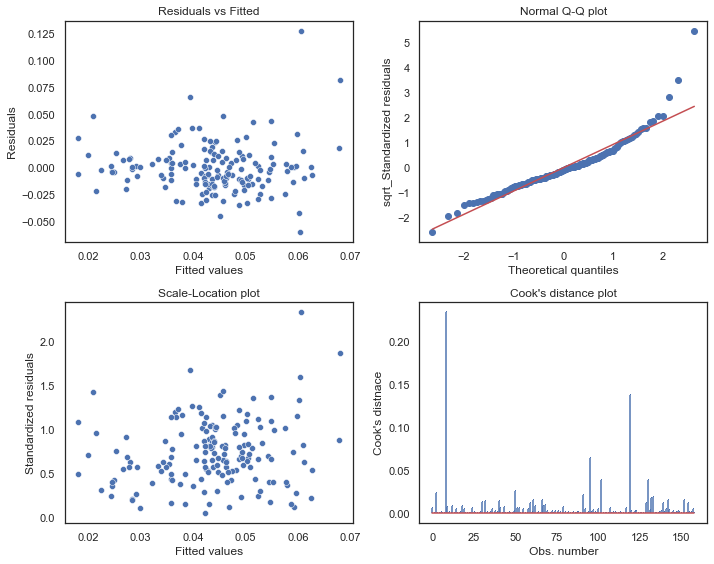

In [60]:
fig, axes = plt.subplots(2,2, figsize = (10,8))
sns.scatterplot(x = y_pred, y = residuals, ax =axes[0,0])
axes[0,0].set_title('Residuals vs Fitted')
axes[0,0].set_xlabel('Fitted values')
axes[0,0].set_ylabel('Residuals')

import scipy as sp
sp.stats.probplot(x = stand_residuals, plot = axes[0,1], fit = False)
axes[0,1].set_title('Normal Q-Q plot')
axes[0,1].set_ylabel('sqrt_Standardized residuals')

sns.scatterplot(x = y_pred, y = np.sqrt(abs(stand_residuals)), ax =axes[1,0])
axes[1,0].set_title('Scale-Location plot')
axes[1,0].set_ylabel('Standardized residuals')
axes[1,0].set_xlabel('Fitted values')


from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf = influence(lmodi)
C, P = inf.cooks_distance
axes[1,1].stem(C, markerfmt=",")
axes[1,1].set_title("Cook's distance plot")
axes[1,1].set_xlabel('Obs. number')
axes[1,1].set_ylabel("Cook's distnace")


plt.tight_layout();

<h2> Weighted least squares:

In [59]:
df_gavote.head()

,counties,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots,absolute_undercount,relative_undercount,pergore,cperAA,cpergore
0,APPLING,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617,518,0.078283,0.343171,-0.060981,-0.065151
1,ATKINSON,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149,78,0.036296,0.396427,-0.012981,-0.011895
2,BACON,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347,352,0.105169,0.319199,-0.111981,-0.089123
3,BAKER,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607,88,0.054760,0.587887,0.233019,0.179565
4,BALDWIN,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785,659,0.051545,0.485981,0.116019,0.077659


In [120]:
wlmodi = smf.wls(data = df_gavote, formula = 'relative_undercount~cperAA+cpergore*rural+equip', weights = np.array(df_gavote['ballots'])).fit()

In [121]:
wlmodi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             WLS Regression Results                            
===============================================================================
Dep. Variable:     relative_undercount   R-squared:                       0.410
Model:                             WLS   Adj. R-squared:                  0.378
Method:                  Least Squares   F-statistic:                     13.02
Date:                 Thu, 24 Mar 2022   Prob (F-statistic):           3.67e-14
Time:                         05:37:34   Log-Likelihood:                 364.72
No. Observations:                  159   AIC:                            -711.4
Df Residuals:                      150   BIC:                            -683.8
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0437      0.003     12.689      0.000       0.037       0.050
rural[T.urban]             -0.0179      0.004     -4.815      0.000      -0.025      -0.011
equip[T.OS-CC]              0.0056      0.005      1.201      0.232      -0.004       0.015
equip[T.OS-PC]             -0.0058      0.005     -1.242      0.216      -0.015       0.003
equip[T.PAPER]             -0.0142      0.037     -0.380      0.705      -0.088       0.060
equip[T.PUNCH]              0.0157      0.005      2.913      0.004       0.005       0.026
cperAA                      0.0681      0.028      2.473      0.015       0.014       0.123
cpergore                   -0.0469      0.053     -0.889      0.375      -0.151       0.057
cpergore:rural[T.urban]     0.0120      0.036      0.337      0.737      -0.058       0.082
==============================================================================
Omnibus:                       55.024   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.937
Skew:                           1.160   Prob(JB):                     1.08e-58
Kurtosis:                       8.909   Cond. No.                         65.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
np.sqrt(0.035*(1-0.035)/881)

0.006191697417719903

<h2> Transformation

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
poly_trans = PolynomialFeatures(degree=4)

In [126]:
poly_cperAA = poly_trans.fit_transform(np.array(df_gavote['cperAA']).reshape(-1,1))

In [127]:
plmodi = smf.ols(data = df_gavote, formula = 'relative_undercount~poly_cperAA+cpergore*rural+equip').fit()

In [128]:
plmodi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     relative_undercount   R-squared:                       0.173
Model:                             OLS   Adj. R-squared:                  0.111
Method:                  Least Squares   F-statistic:                     2.788
Date:                 Thu, 24 Mar 2022   Prob (F-statistic):            0.00254
Time:                         05:40:44   Log-Likelihood:                 376.71
No. Observations:                  159   AIC:                            -729.4
Df Residuals:                      147   BIC:                            -692.6
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0215      0.002     12.590      0.000       0.018       0.025
rural[T.urban]             -0.0191      0.005     -4.035      0.000      -0.028      -0.010
equip[T.OS-CC]              0.0064      0.005      1.364      0.175      -0.003       0.016
equip[T.OS-PC]              0.0156      0.006      2.652      0.009       0.004       0.027
equip[T.PAPER]             -0.0103      0.017     -0.597      0.551      -0.044       0.024
equip[T.PUNCH]              0.0141      0.007      2.047      0.042       0.000       0.028
poly_cperAA[0]              0.0215      0.002     12.590      0.000       0.018       0.025
poly_cperAA[1]              0.0125      0.047      0.268      0.789      -0.079       0.104
poly_cperAA[2]              0.0545      0.112      0.486      0.628      -0.167       0.276
poly_cperAA[3]              0.3226      0.632      0.510      0.611      -0.927       1.572
poly_cperAA[4]             -0.8860      1.298     -0.682      0.496      -3.452       1.680
cpergore                    0.0132      0.057      0.231      0.818      -0.099       0.126
cpergore:rural[T.urban]    -0.0105      0.041     -0.255      0.799      -0.092       0.071
==============================================================================
Omnibus:                       68.711   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.174
Skew:                           1.528   Prob(JB):                     9.02e-72
Kurtosis:                       9.328   Cond. No.                     2.52e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h2> Variable selection: </h2>

In [133]:
biglm = smf.ols(data=df_gavote, formula = '(relative_undercount ~ (equip+econ+rural+atlanta)**2+(equip+econ+rural+atlanta)*(perAA+pergore))').fit()

In [138]:
biglm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     relative_undercount   R-squared:                       0.504
Model:                             OLS   Adj. R-squared:                  0.335
Method:                  Least Squares   F-statistic:                     2.994
Date:                 Thu, 24 Mar 2022   Prob (F-statistic):           2.36e-06
Time:                         05:56:42   Log-Likelihood:                 417.34
No. Observations:                  159   AIC:                            -752.7
Df Residuals:                      118   BIC:                            -626.9
Df Model:                           40                                         
Covariance Type:             nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0626      0.094      0.666      0.507      -0.124       0.249
equip[T.OS-CC]                           0.0377      0.049      0.769      0.443      -0.059       0.135
equip[T.OS-PC]                          -0.0733      0.055     -1.326      0.187      -0.183       0.036
equip[T.PAPER]                          -0.0228      0.015     -1.500      0.136      -0.053       0.007
equip[T.PUNCH]                          -0.0122      0.058     -0.212      0.832      -0.126       0.102
econ[T.poor]                             0.0110      0.017      0.636      0.526      -0.023       0.045
econ[T.rich]                            -0.0807      0.142     -0.568      0.571      -0.362       0.201
rural[T.urban]                          -0.0048      0.053     -0.091      0.928      -0.110       0.100
atlanta[T.notAtlanta]                   -0.0312      0.091     -0.342      0.733      -0.212       0.149
equip[T.OS-CC]:econ[T.poor]             -0.0113      0.011     -1.040      0.301      -0.033       0.010
equip[T.OS-PC]:econ[T.poor]              0.0303      0.017      1.801      0.074      -0.003       0.064
equip[T.PAPER]:econ[T.poor]             -0.0228      0.015     -1.500      0.136      -0.053       0.007
equip[T.PUNCH]:econ[T.poor]              0.0139      0.032      0.435      0.664      -0.049       0.077
equip[T.OS-CC]:econ[T.rich]              0.0152      0.040      0.384      0.701      -0.063       0.094
equip[T.OS-PC]:econ[T.rich]              0.0239      0.030      0.808      0.421      -0.035       0.083
equip[T.PAPER]:econ[T.rich]           2.317e-16   3.78e-16      0.613      0.541   -5.17e-16     9.8e-16
equip[T.PUNCH]:econ[T.rich]              0.0219      0.040      0.553      0.581      -0.056       0.100
equip[T.OS-CC]:rural[T.urban]            0.0004      0.012      0.033      0.973      -0.024       0.024
equip[T.OS-PC]:rural[T.urban]           -0.0114      0.017     -0.661      0.510      -0.046       0.023
equip[T.PAPER]:rural[T.urban]         5.713e-17   5.16e-16      0.111      0.912   -9.66e-16    1.08e-15
equip[T.PUNCH]:rural[T.urban]            0.0399      0.028      1.432      0.155      -0.015       0.095
equip[T.OS-CC]:atlanta[T.notAtlanta]    -0.0496      0.040     -1.244      0.216      -0.128       0.029
equip[T.OS-PC]:atlanta[T.notAtlanta]    -0.0413      0.046     -0.901      0.369      -0.132       0.049
equip[T.PAPER]:atlanta[T.notAtlanta]    -0.0228      0.015     -1.500      0.136      -0.053       0.007
equip[T.PUNCH]:atlanta[T.notAtlanta]    -0.0507      0.040     -1.255      0.212      -0.131       0.029
econ[T.poor]:rural[T.urban]             -0.0173      0.019     -0.895      0.372      -0.056       0.021
econ[T.rich]:rural[T.urban]